# Importación de librerías y lectura del Data Frame

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
df_secundario = pd.read_csv("/content/drive/MyDrive/secondary_data.csv", delimiter=';')

# Exploración de los datos




Elimino las columnas que no voy a usar. En este caso voy a plantear un árbol de decisión simple con las columnas más importantes en general del Random Forest.

In [ ]:
df_secundario = df_secundario.drop("cap-surface", axis = 1)
df_secundario = df_secundario.drop("stem-root", axis = 1)
df_secundario = df_secundario.drop("stem-surface", axis = 1)
df_secundario = df_secundario.drop("veil-type", axis = 1)
df_secundario = df_secundario.drop("veil-color", axis = 1)
df_secundario = df_secundario.drop("spore-print-color", axis = 1)
df_secundario = df_secundario.drop("has-ring", axis = 1)
df_secundario = df_secundario.drop("ring-type", axis = 1)
df_secundario = df_secundario.drop("season", axis = 1)
df_secundario = df_secundario.drop("habitat", axis = 1)
df_secundario = df_secundario.drop("does-bruise-or-bleed", axis = 1)

In [ ]:
# Imputa los Nans dedos un df, la nombre de la features y un caracter.
def imputar_nans(df, nombre_feature, caracter):

  df[nombre_feature] = df[nombre_feature].fillna(caracter)


In [ ]:
imputar_nans(df_secundario, 'gill-attachment', 'o')
imputar_nans(df_secundario, 'gill-spacing', 'o')

# Preparación de los datos

En esta sección se preparan los datos para realizar un Árbol de decisión simple.


Separo el target del resto del Data Frame.

In [ ]:
X = df_secundario.drop('class', axis=1)

In [ ]:
y = df_secundario['class']

Creo un set de entrenamiento y uno de medición.

In [ ]:
X_train, X_med, y_train, y_med = train_test_split(X, y, test_size=0.2, random_state=13)

Creo un set de testeo y uno de validación a partir del de medición.

In [ ]:
X_test, X_validation, y_test, y_validation = train_test_split(X_med, y_med, test_size=0.5, random_state=13)

Voy a utilizar una variable binaria {0, 1} para representar al target ("class") en donde 1 es para indicar que el hongo es venenoso ('p') y 0 si el hongo es comestible ('e').

In [ ]:
y_train =  y_train.map(lambda x: 1 if x == 'p' else 0)

In [ ]:
y_validation =  y_validation.map(lambda x: 1 if x == 'p' else 0)

In [ ]:
y_test =  y_test.map(lambda x: 1 if x == 'p' else 0)

Aplico OHE como encoding.

In [ ]:
#Aplica OHE a cada columna dada una feature
def aplicar_ohe(nombre_feature, columnas):

  global X_train, X_test, X_validation
  ohe = OneHotEncoder()
  encoded_train = ohe.fit_transform(X_train[[nombre_feature]]).todense().astype(int)
  encoded_test = ohe.fit_transform(X_test[[nombre_feature]]).todense().astype(int)
  encoded_validation = ohe.transform(X_validation[[nombre_feature]]).todense().astype(int)
  X_train = X_train.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_train))
  X_test = X_test.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_test))
  X_validation = X_validation.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_validation))
  X_train = X_train.rename(columns=columnas)
  X_test = X_test.rename(columns=columnas)
  X_validation = X_validation.rename(columns=columnas)

Con "cap-shape":

In [ ]:
aplicar_ohe('cap-shape', {0:'b0',1:'c0',2:'f0',3:'o0',4:'p0',5:'s0',6:'x0'})

Con "cap-color":

In [ ]:
aplicar_ohe('cap-color', {0:'b2',1:'e2',2:'g2',3:'k2',4:'l2',5:'n2',6:'o2', 7:'p2', 8:'r2', 9:'u2', 10:'w2', 11:'y2'})

Con "gill-attachment":

In [ ]:
aplicar_ohe('gill-attachment', {0:'a4',1:'d4',2:'e4',3:'f4',4:'o4',5:'p4',6:'s4', 7:'x4'})

Con "gill-spacing":

In [ ]:
aplicar_ohe('gill-spacing', {0:'c5',1:'d5',2:'f5',3:'o5'})

Con "gill-color":

In [ ]:
aplicar_ohe('gill-color', {0:'b6',1:'e6',2:'f6',3:'g6',4:'k6',5:'n6',6:'o6', 7:'p6', 8:'r6', 9:'u6', 10:'w6', 11:'y6'})

Con "stem-color":

In [ ]:
aplicar_ohe('stem-color', {0:'b9',1:'e9',2:'f9',3:'g9',4:'k9',5:'l9',6:'n9', 7:'o9', 8:'p9', 9:'r9', 10:'u9', 11:'w9', 12:'y9'})

# Entrenamiento y validación del modelo

Entreno un árbol simple de decisión. No se van a buscar híper parámetros para este modelo.

In [ ]:
tree_simple = DecisionTreeClassifier(random_state=16, max_depth= 5)

In [ ]:
tree_simple.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=16)

Grafico del árbol.

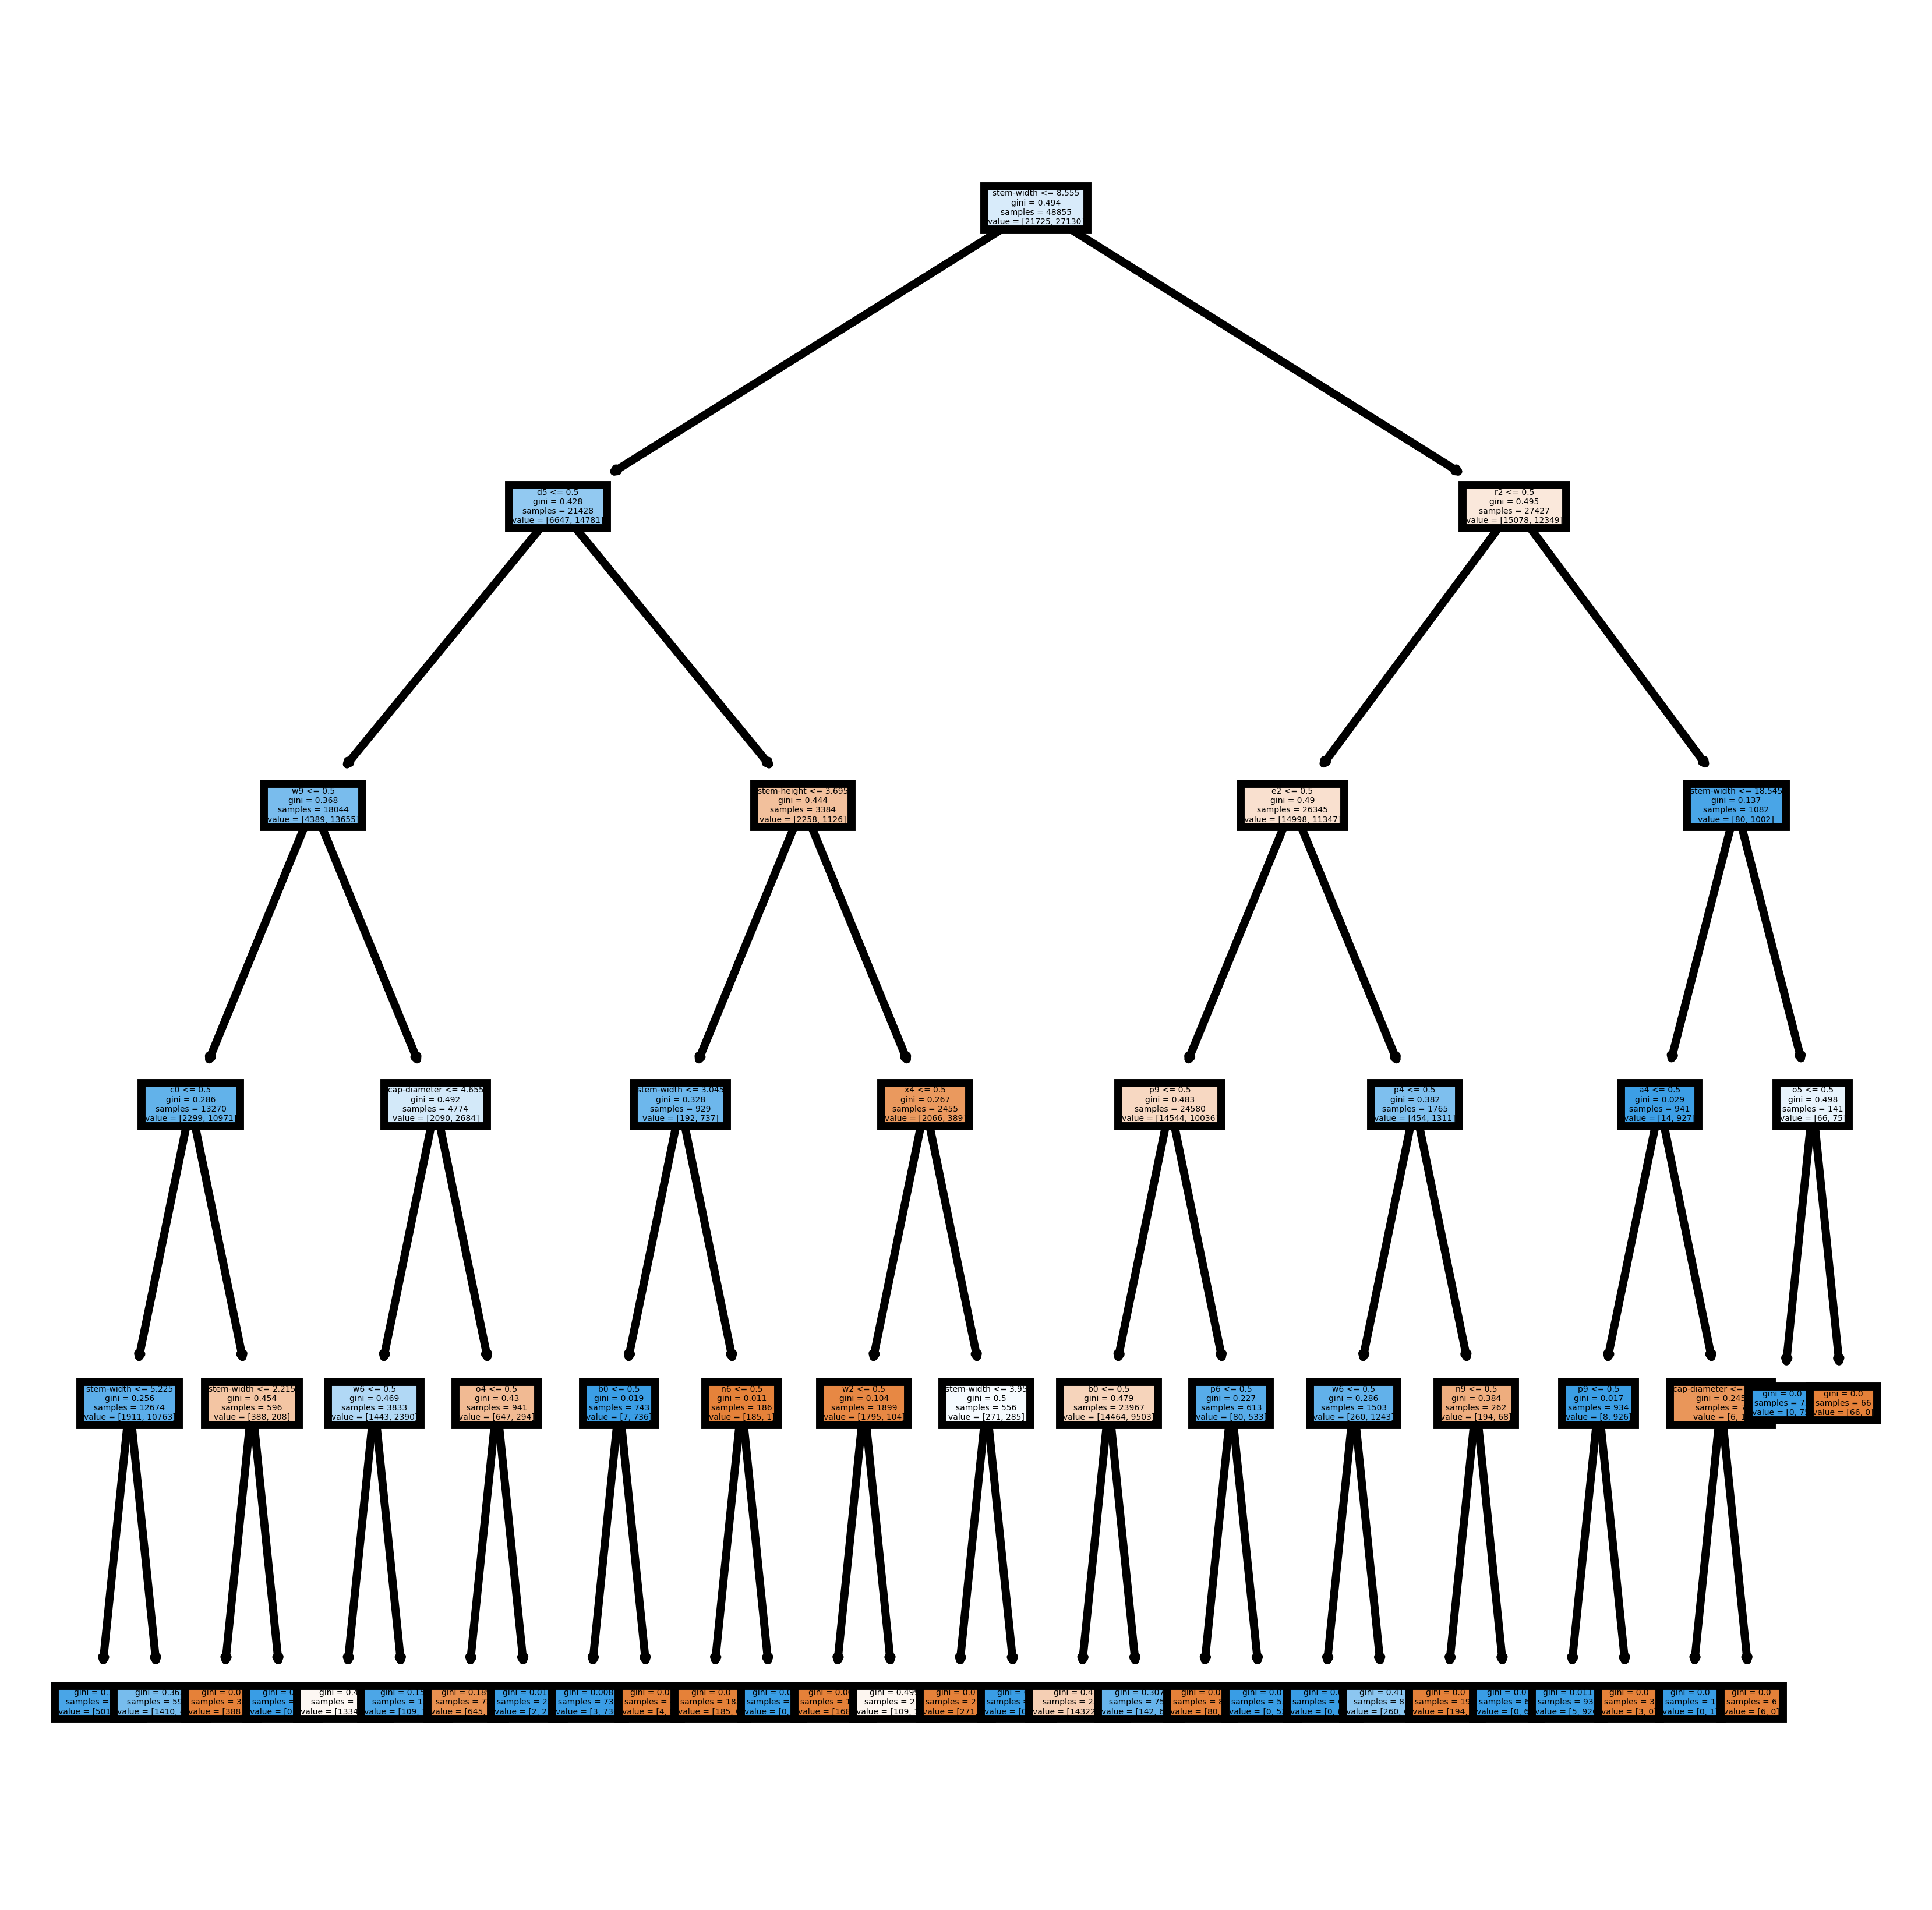

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_simple,
               feature_names = X_train.columns,
               filled = True);

Métricas del set de validación.

In [ ]:
y_pred_validation = tree_simple.predict(X_validation)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
print("RMSE: %f" % (rmse))

RMSE: 0.511854


In [ ]:
roc_auc = roc_auc_score(y_validation, tree_simple.predict_proba(X_validation)[:, 1])
print("ROC AUC SCORE:", roc_auc)

ROC AUC SCORE: 0.8017749922080447


In [ ]:
error = 1 - roc_auc
print("El nivel de error es de: ", error)

El nivel de error es de:  0.1982250077919553


Para este caso y a diferencia del modelo de la parte 3, se buscó realizar un árbol de decisión que sea lo más simple posible. Para realizarlo, se usaron las features más importantes del Random Forest y tan solo se usaron como maximo 5 niveles de profundidad, ya que justamente la idea es tener un árbol de decisión sencillo que le permita a una persona saber si el hongo es venenoso o comestible dadas ciertas características.

